In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import torch.nn.functional as F

In [2]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [3]:
def detect_sentiment_scores(text):
    inputs = tokenizer(text, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    probs = F.softmax(logits, dim=-1).squeeze().tolist()  # Convert logits to probabilities
    return probs

In [5]:
file_path = "/content/commentary_2023.csv"  # Replace with your file path
df1 = pd.read_csv(file_path)

In [6]:
df1[['negative_score', 'positive_score']] = df1['commentary'].apply(lambda x: pd.Series(detect_sentiment_scores(x)))

In [7]:
df1['sentiment'] = df1.apply(
    lambda row: "POSITIVE" if row['positive_score'] > row['negative_score'] else "NEGATIVE",
    axis=1
)

In [8]:
df1

,Unnamed: 0,commentary,negative_score,positive_score,sentiment
0,19,Travis Head | Player of the Match - 137(120): ...,0.000470,0.999530,POSITIVE
1,20,Adam Zampa: Interesting to see the strategy to...,0.125799,0.874201,POSITIVE
2,21,"Mitchell Starc: He (Cummins) was phenomenal, h...",0.000878,0.999122,POSITIVE
3,22,Steve Smith: Incredible feeling! Atmosphere wa...,0.000174,0.999826,POSITIVE
4,23,Mitch Marsh: Pure elation right now. Been the ...,0.006864,0.993136,POSITIVE
...,...,...,...,...,...
370,442,Round the wicket to Head,0.007428,0.992572,POSITIVE
371,443,"Bumrah to Warner, 3 runs, nice outswing again ...",0.364198,0.635802,POSITIVE
372,444,Bumrah round the wicket to Head and two slips ...,0.005014,0.994986,POSITIVE
373,445,"Bumrah to Warner, FOUR, edgedddd and no-one go...",0.556780,0.443220,NEGATIVE


Get the CSV file

In [14]:
df1.to_csv('commentary_2023_with_sentiments.csv', index=False)

In [15]:
df1['sentiment'].unique()

array(['POSITIVE', 'NEGATIVE'], dtype=object)

In [16]:
sentiment_counts = df1['sentiment'].value_counts()

<ipython-input-17-8e68515b28f4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


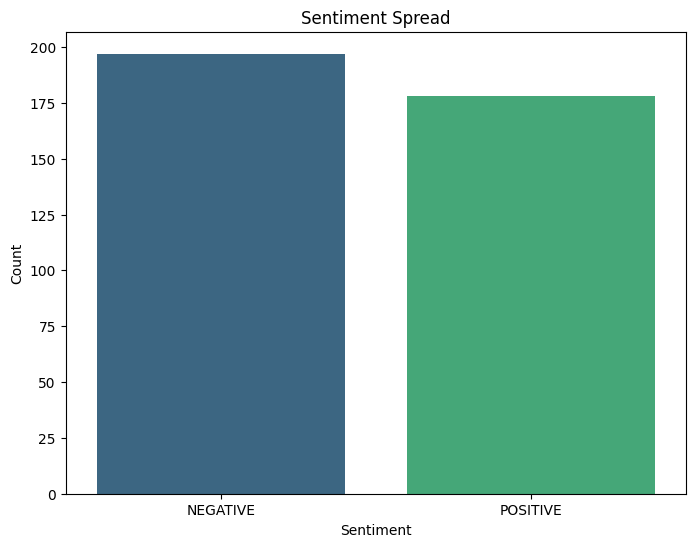

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Spread')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

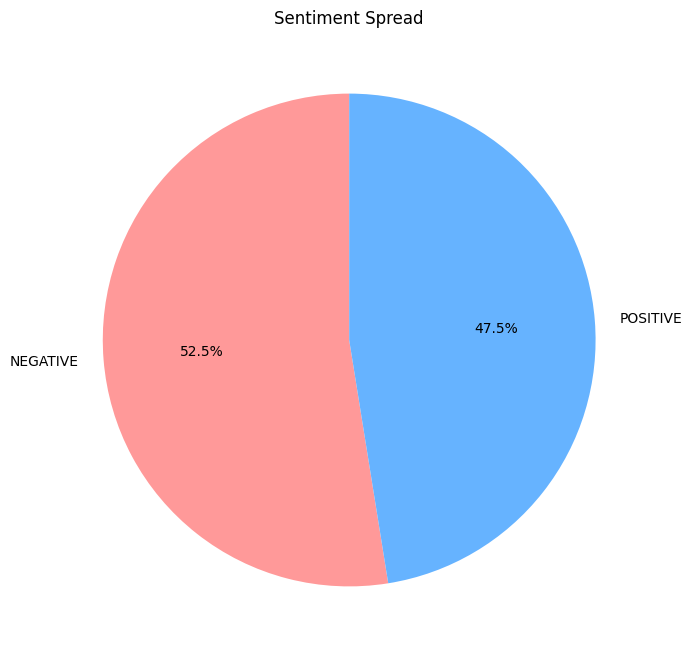

In [18]:
plt.figure(figsize=(8, 8))
sentiment_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Sentiment Spread')
plt.ylabel('')
plt.show()